In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def sobel_sharpness(image):
    """
    Функция для оценки резкости изображения с помощью оператора Собеля.

    Параметры:
    image (numpy.ndarray): Исходное цветное изображение.

    Возвращаемые значения:
    sharpness (float): Среднее значение резкости изображения.
    gradient_magnitude (numpy.ndarray): Магнитуда градиента для каждого пикселя.

    Процесс работы функции:
    1. Преобразует входное изображение в оттенки серого.
    2. Вычисляет горизонтальный и вертикальный градиенты с помощью оператора Собеля.
    3. Объединяет результаты вычислений для получения магнитуды градиента.
    4. Оценивает среднее значение магнитуды градиента как показатель резкости.
    5. Возвращает оценку резкости и матрицу магнитуд градиента.

    Использование:
    sharpness, gradient_magnitude = sobel_sharpness(image)

    Затем можно использовать 'sharpness' для оценки общей резкости изображения,
    а 'gradient_magnitude' для визуализации или дальнейшего анализа.
    """
    # Преобразование изображения в оттенки серого
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Применение оператора Собеля для вычисления градиента по X и Y
    grad_x = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=1)  # Горизонтальный градиент
    grad_y = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=1)  # Вертикальный градиент
    
    # Вычисление величины градиента
    gradient_magnitude = cv2.magnitude(grad_x, grad_y)
    
    # Оценка резкости изображения: среднее значение величины градиента
    sharpness = np.mean(gradient_magnitude)
    
    return sharpness, gradient_magnitude


In [4]:
def plot_image_and_histogram(noisy_image, title="Noisy Image"):
    """
    Функция для отображения гистограммы и изображения шума.

    Параметры:
    noisy_image (numpy.array): Исходное изображение с шумом.
    title (str): Заголовок для отображения. По умолчанию "Noisy Image".

    Вывод:
    Отображает график с гистограммой на левой стороне и изображением на правой стороне.
    """
    plt.figure(figsize=(10, 5))

    # Гистограмма
    plt.subplot(1, 2, 1)
    plt.hist(noisy_image.flatten(), bins=50, color='gray', alpha=0.7)
    plt.title(f'Histogram of {title}')  # Заголовок гистограммы

    # Изображение
    plt.subplot(1, 2, 2)
    plt.imshow(noisy_image, cmap='gray')
    plt.title(title)  # Заголовок изображения
    plt.axis('off')   # Выключаем оси для чистоты вида
    plt.show()        # Отображаем результат


Sharpness: (16.699932480586067, array([[  0.        , 120.        ,   9.        , ...,   0.        ,
          3.        ,   0.        ],
       [  1.        , 106.00471688,  63.28506933, ...,   3.60555128,
          6.        ,   8.        ],
       [  3.        ,  70.45565982,  60.16643583, ...,   7.07106781,
          4.24264069,   6.        ],
       ...,
       [  6.        ,  42.10700654,  21.02379604, ...,   3.16227766,
          4.24264069,   5.        ],
       [  2.        ,  40.19950248,  19.31320792, ...,  97.02061637,
         98.04590761,  97.        ],
       [  0.        ,  37.        ,  14.        , ...,   2.        ,
          3.        ,   0.        ]]))


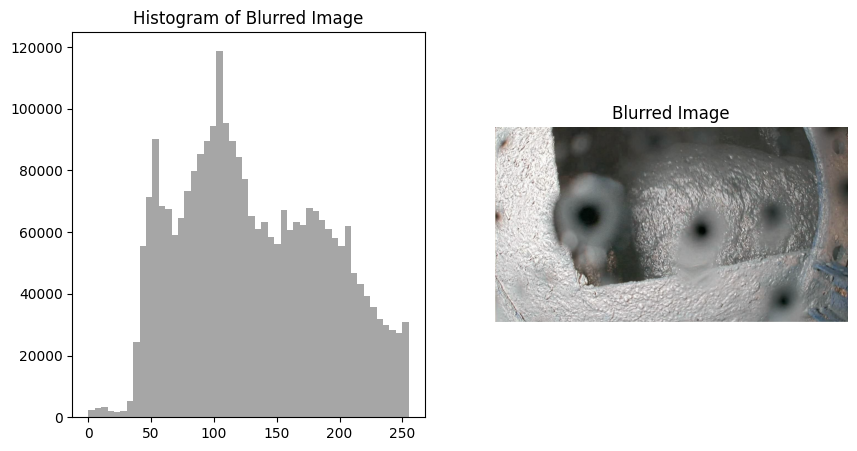

In [5]:
# Загружаем изображение
image = cv2.imread("/Users/solyanikvarvara/Downloads/2024-12-06 21.50.11.jpg")

# Оценка резкости изображения с помощью метода Собеля
sharpness = sobel_sharpness(image)
print(f"Sharpness: {sharpness}")

# Визуализируем изображение и его гистограмму
plot_image_and_histogram(image, "Blurred Image")


Sharpness of sharp image: (16.699932480586067, array([[  0.        , 120.        ,   9.        , ...,   0.        ,
          3.        ,   0.        ],
       [  1.        , 106.00471688,  63.28506933, ...,   3.60555128,
          6.        ,   8.        ],
       [  3.        ,  70.45565982,  60.16643583, ...,   7.07106781,
          4.24264069,   6.        ],
       ...,
       [  6.        ,  42.10700654,  21.02379604, ...,   3.16227766,
          4.24264069,   5.        ],
       [  2.        ,  40.19950248,  19.31320792, ...,  97.02061637,
         98.04590761,  97.        ],
       [  0.        ,  37.        ,  14.        , ...,   2.        ,
          3.        ,   0.        ]]))


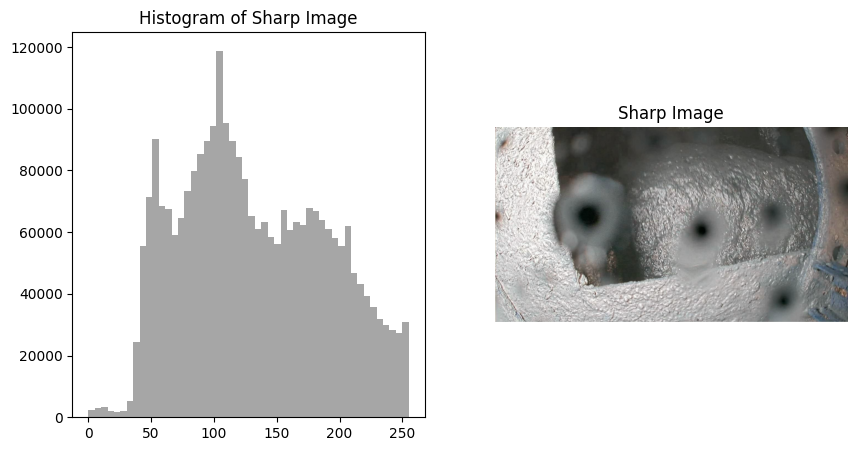

In [6]:
# Загружаем изображение без размытия
image_sharp = cv2.imread("/Users/solyanikvarvara/Downloads/2024-12-06 21.50.11.jpg")

# Оценка резкости изображения с помощью метода Собеля
sharpness_sharp = sobel_sharpness(image_sharp)
print(f"Sharpness of sharp image: {sharpness_sharp}")

# Визуализируем изображение и его гистограмму
plot_image_and_histogram(image_sharp, "Sharp Image")


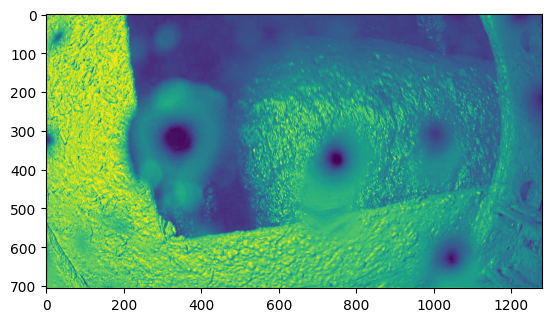

In [7]:
plt.imshow(image[:, :, 2])

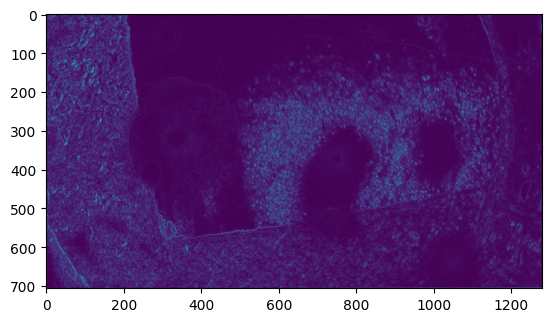

In [8]:
plt.imshow(sharpness[1])

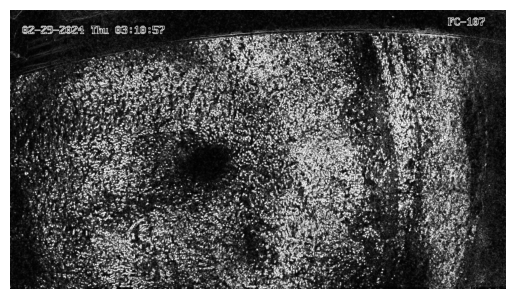

In [12]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

import cv2
import matplotlib.pyplot as plt

def sobel_filter(image_path):
    """
    Применяет фильтр Собеля к изображению для обнаружения границ и контуров.

    Параметры:
    image_path (str): Путь к изображению.

    Возвращаемое значение:
    Tuple: кортеж содержащий объект для отображения изображения и команду для отключения осей.
    """
    # Загрузка изображения в режиме чёрно-белого
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Применяем фильтр Собеля для нахождения градиента по X и Y
    sobel_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)  # Градиент по оси X
    sobel_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)  # Градиент по оси Y

    # Рассчитываем величину градиента (комбинированный результат)
    gradient_magnitude = cv2.magnitude(sobel_x, sobel_y)

    # Преобразуем результат в формат изображений (целочисленный)
    sobel_x = cv2.convertScaleAbs(sobel_x)
    sobel_y = cv2.convertScaleAbs(sobel_y)
    gradient_magnitude = cv2.convertScaleAbs(gradient_magnitude)

    # Отображаем результат с отключенными осами
    return plt.imshow(gradient_magnitude, cmap='gray'), plt.axis('off')

# Пример использования
image_path = '/Users/solyanikvarvara/Desktop/хак2/misis_chill/new_photos/cv_open_dataset/open_img/1709143887_0.jpg'
result = sobel_filter(image_path)
plt.show()  # Отображаем результат



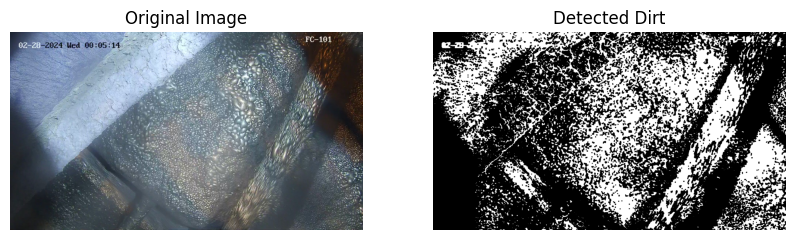

In [13]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

import cv2
import numpy as np
import matplotlib.pyplot as plt

def detect_dirt_in_image(image_path, threshold_value=100, kernel_size=(5, 5)):
    """
    Обнаруживает загрязнения на изображении с помощью метода детекции градиентов.

    Параметры:
    image_path (str): Путь к изображению.
    threshold_value (int): Значение порога для бинарной обработки. По умолчанию 100.
    kernel_size (tuple): Размер ядра для морфологической операции. По умолчанию (5, 5).

    Возвращаемое значение:
    numpy.array: Чистое изображение с обнаруженными загрязнениями.
    """
    # Загрузка изображения в режиме чёрно-белого
    gray = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Вычисление градиента по оси X и Y
    grad_x = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=3)
    grad_y = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=3)

    # Рассчет величины градиента
    gradient_magnitude = cv2.magnitude(grad_x, grad_y)

    # Преобразование результата в целочисленный тип
    gradient_magnitude = cv2.convertScaleAbs(gradient_magnitude)

    # Бинарная обработка на основе порога
    _, binary_image = cv2.threshold(gradient_magnitude, threshold_value, 255, cv2.THRESH_BINARY)

    # Создание ядра для морфологической операции
    kernel = np.ones(kernel_size, np.uint8)

    # Закрытие областей с помощью морфологической операции
    cleaned_image = cv2.morphologyEx(binary_image, cv2.MORPH_CLOSE, kernel)

    return cleaned_image

# Пример использования функции
image_path = '/Users/solyanikvarvara/Desktop/misis_chill/new_photos/cv_open_dataset/open_img/1709046321_0.jpg'
detected_dirt = detect_dirt_in_image(image_path, threshold_value=100, kernel_size=(5, 5))

# Отображение результатов
plt.figure(figsize=(10, 10))
original_image = cv2.imread(image_path)
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(detected_dirt, cmap='gray')
plt.title("Detected Dirt")
plt.axis('off')
plt.show()


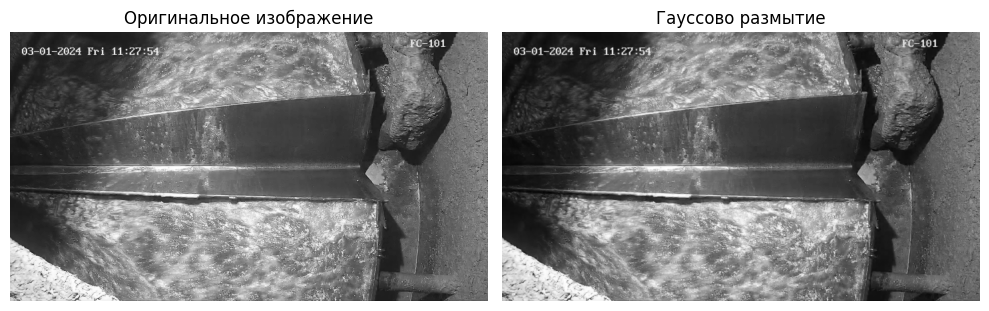

In [15]:
import cv2
import matplotlib.pyplot as plt

def gaussian_blur(image_path, kernel_size=(5, 5), sigma=1):
    """
    Применяет Гауссово размытие к изображению.

    Параметры:
    image_path (str): Путь к изображению.
    kernel_size (tuple): Размер ядра для размытия. По умолчанию (5, 5).
    sigma (float): Сигма для определения размера ядра. По умолчанию 1.

    Возвращаемое значение:
    None
    """
    # Загрузка изображения
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    if image is None:
        print("Ошибка: не удалось загрузить изображение")
        return

    # Применяем Гауссово размытие
    blurred_image = cv2.GaussianBlur(image, kernel_size, sigma)

    # Отображаем результаты
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.title("Оригинальное изображение")
    plt.imshow(image, cmap='gray')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.title("Гауссово размытие")
    plt.imshow(blurred_image, cmap='gray')
    plt.axis('off')

    plt.tight_layout()
    plt.show()

# Пример использования функции
image_path = '/Users/solyanikvarvara/Desktop/хак2/misis_chill/new_photos/cv_open_dataset/open_img/1709260082_0.jpg'
gaussian_blur(image_path)
